In [1]:
pip install wooldridge

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 19.7 MB/s eta 0:00:00


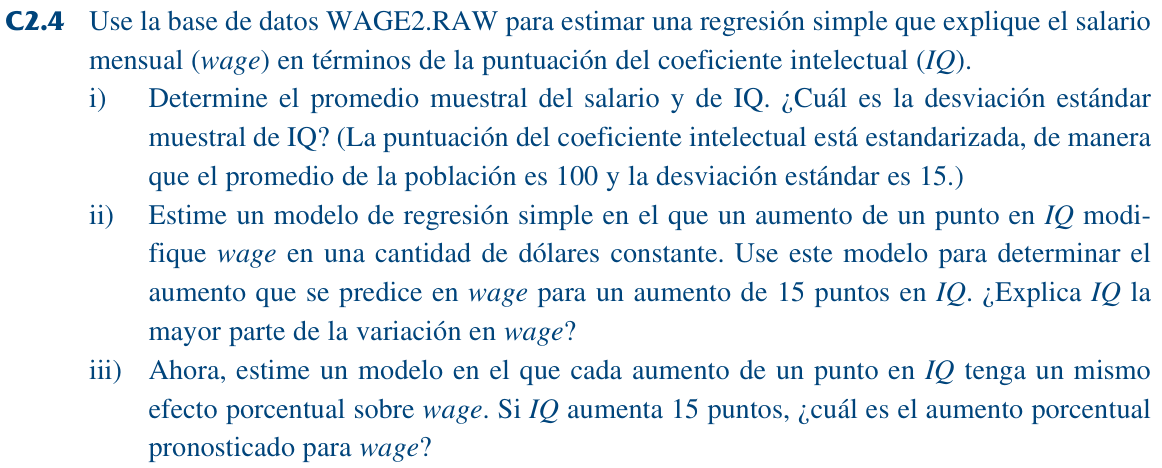

In [2]:
# Importar los paquetes necesarios
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
from wooldridge import data

In [3]:
# Cargar la base de datos WAGE2.RAW
wage2 = data('wage2')

# i) Promedio muestral y desviación estándar de wage e IQ
wage_mean = wage2['wage'].mean()
iq_mean = wage2['IQ'].mean()
iq_std = wage2['IQ'].std()

In [4]:
# Mostrar los resultados
print(f"Promedio muestral del salario (wage): {wage_mean:.2f}")
print(f"Promedio muestral de IQ: {iq_mean:.2f}")
print(f"Desviación estándar muestral de IQ: {iq_std:.2f}")

Promedio muestral del salario (wage): 957.95
Promedio muestral de IQ: 101.28
Desviación estándar muestral de IQ: 15.05


In [5]:
# ii) Modelo de regresión simple para wage en función de IQ
model1 = smf.ols('wage ~ IQ', data=wage2).fit()
print(model1.summary())
coef_model1 = model1.params

# Predicción de aumento en wage por un aumento de 15 puntos en IQ
increase_iq_15 = coef_model1['IQ'] * 15

# R-cuadrado del modelo para medir la variación explicada
r_squared_model1 = model1.rsquared

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     98.55
Date:                Sat, 11 Jan 2025   Prob (F-statistic):           3.79e-22
Time:                        07:45:50   Log-Likelihood:                -6891.4
No. Observations:                 935   AIC:                         1.379e+04
Df Residuals:                     933   BIC:                         1.380e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    116.9916     85.642      1.366      0.1

In [6]:
print("\nModelo de regresión simple (wage ~ IQ):")
print(f"Intercepto: {coef_model1['Intercept']:.2f}")
print(f"Coeficiente de IQ: {coef_model1['IQ']:.2f}")
print(f"R-cuadrado: {r_squared_model1:.4f}")
print(f"Aumento predicho en wage por un aumento de 15 puntos en IQ: {increase_iq_15:.2f}")


Modelo de regresión simple (wage ~ IQ):
Intercepto: 116.99
Coeficiente de IQ: 8.30
R-cuadrado: 0.0955
Aumento predicho en wage por un aumento de 15 puntos en IQ: 124.55


In [7]:
# iii) Modelo de regresión logarítmica (efecto porcentual)
model2 = smf.ols('np.log(wage) ~ IQ', data=wage2).fit()
print(model2.summary())
coef_model2 = model2.params

# Predicción de aumento porcentual en wage para un aumento de 15 puntos en IQ
percent_increase_iq_15 = coef_model2['IQ'] * 15 * 100

                            OLS Regression Results                            
Dep. Variable:           np.log(wage)   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     102.6
Date:                Sat, 11 Jan 2025   Prob (F-statistic):           5.93e-23
Time:                        07:45:50   Log-Likelihood:                -468.85
No. Observations:                 935   AIC:                             941.7
Df Residuals:                     933   BIC:                             951.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.8870      0.089     66.131      0.0

In [8]:
print("\nModelo de regresión logarítmica (log(wage) ~ IQ):")
print(f"Intercepto: {coef_model2['Intercept']:.4f}")
print(f"Coeficiente de IQ: {coef_model2['IQ']:.4f}")
print(f"Aumento porcentual predicho en wage por un aumento de 15 puntos en IQ: {percent_increase_iq_15:.2f}%")


Modelo de regresión logarítmica (log(wage) ~ IQ):
Intercepto: 5.8870
Coeficiente de IQ: 0.0088
Aumento porcentual predicho en wage por un aumento de 15 puntos en IQ: 13.21%
